# Results Visualizations
> Ignorance is strength

In [ ]:
# hide
import blackhc.project.script

Appended /home/blackhc/PycharmProjects/bald-ical/src to paths
Switched to directory /home/blackhc/PycharmProjects/bald-ical
%load_ext autoreload
%autoreload 2


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc

# MatPlotLib style and settings (that also affect PlotNine)

rc("text", usetex=False)
rc(
    "text.latex",
    preamble=r"""
\usepackage{bbm}
\usepackage{amsmath}
\usepackage{amsfonts}
""",
)

In [ ]:
import collections
import functools
import math
import os
import re
from collections import namedtuple
from dataclasses import dataclass
from typing import NamedTuple

import laaos
import pandas as pd
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_pickle("plots_data/epig_vs_evalbald_bald.pkl")

In [ ]:
df

,acquisition_function,acquisition_size,num_pool_samples,training_set_size,accuracy,nll,seed
0,EPIG,1,100,20,0.7213,0.974201,8957
1,EPIG,1,100,21,0.7177,1.008765,8957
2,EPIG,1,100,22,0.7081,1.034328,8957
3,EPIG,1,100,23,0.7276,1.001319,8957
4,EPIG,1,100,24,0.7431,0.905125,8957
...,...,...,...,...,...,...,...
1510,BALD,1,100,116,0.9221,0.279627,8947
1511,BALD,1,100,117,0.9166,0.267996,8947
1512,BALD,1,100,118,0.9125,0.320064,8947
1513,BALD,1,100,119,0.9108,0.293049,8947


In [ ]:
df.acquisition_size.unique()

array([1])

In [ ]:
df.acquisition_function.unique()

array(['EPIG', 'EvalBALD', 'BALD'], dtype=object)

In [ ]:
eval_bald_nice_acquisition_function_map = {
    "EPIG": "EPIG (ours)",
    "EvalBALD": "EPIG-BALD (ours)",
    "BALD": "BALD",
}


def to_eval_bald_nice_acquisition_function(n):
    return eval_bald_nice_acquisition_function_map[n]

In [ ]:
df["eval_bald_acquisition_function"] = df.acquisition_function.map(eval_bald_nice_acquisition_function_map)

In [ ]:
plt.style.use("seaborn-colorblind")
sns.set_style("whitegrid")
sns.color_palette()

[(0.0, 0.4470588235294118, 0.6980392156862745),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [ ]:
def plt_save(grd, output_path, **kwargs):
    # plt.style.use("seaborn-colorblind")
    grd.savefig(output_path, transparent=True, bbox_inches="tight", pad_inches=0, **kwargs)

In [ ]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

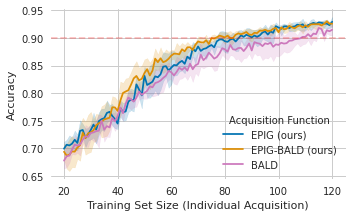

In [ ]:
# (Batch)EvaluationBALD vs (Batch)BALD
fig = plt.figure(figsize=(5,5/1.6))
sns.lineplot(
    x="training_set_size",
    y="accuracy",
    hue="eval_bald_acquisition_function",
    data=df,
    palette=[sns.color_palette("colorblind")[i] for i in [0,1,4]],
    hue_order=list(
        map(
            to_eval_bald_nice_acquisition_function,
            [
                "EPIG",
                "EvalBALD",
                "BALD",
            ],
        )
    ),
)

plt.xlabel("Training Set Size (Individual Acquisition)")
plt.ylabel("Accuracy")
#plt.title("MNIST Acquisition Size = 1")
plt.gca().get_legend().set_title("Acquisition Function")
plt.axhline(0.90, color="red", linestyle="--", alpha=0.25)
plt.tight_layout()

plt.show()

In [ ]:
plt_save(fig, "plots/epig_vs_epigbald_bald.pdf")

AttributeError: 'numpy.ndarray' object has no attribute 'axhline'

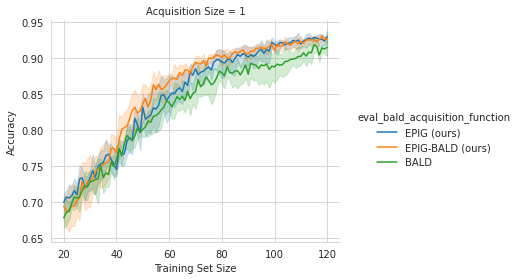

In [ ]:
# (Batch)EvaluationBALD vs (Batch)BALD
grd = sns.relplot(
    x="training_set_size",
    y="accuracy",
    col="acquisition_size",
    #col_wrap=2,
    hue="eval_bald_acquisition_function",
    data=df,
    kind="line",
    height=4,
    aspect=1/1.6,
    hue_order=list(
        map(
            to_eval_bald_nice_acquisition_function,
            [
                "EPIG",
                "EvalBALD",
                "BALD",
            ],
        )
    ),
)

grd.set_xlabels("Training Set Size")
grd.set_ylabels("Accuracy")
grd._legend.set_title("Acquisition Function")
grd.set_titles("Acquisition Size = {col_name}")
grd.tight_layout()

for i in range(1):
    #grd.axes[i].axhline(0.95, color="red", linestyle="--", alpha=0.25)
    grd.axes[i].axhline(0.90, color="red", linestyle="--", alpha=0.25)

handles, labels = grd.axes[0].get_legend_handles_labels()
#grd._legend.remove()
#grd.fig.legend(handles, labels, ncol=3, loc='lower left', title="Acquisition Function",
#                bbox_to_anchor=(0.05, -0.10), frameon=False)

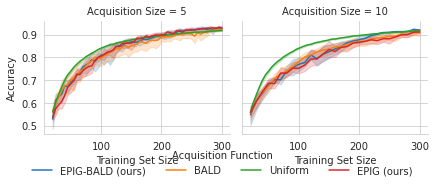

In [ ]:
# (Batch)EvaluationBALD vs (Batch)BALD
grd = sns.relplot(
    x="training_set_size",
    y="accuracy",
    col="acquisition_size",
    col_wrap=2,
    hue="eval_bald_nice_acquisition_function_map",
    data=df[
        df["acquisition_function"].isin(
            [
                "baldical",
                "random",
                "bald",
                "ical",
            ]
        ) &
        df["acquisition_size"].isin([5,10])
    ], #.sample(frac=0.01),
    kind="line",
    height=2.5,
    aspect=2/1.6,
    hue_order=list(
        map(
            to_eval_bald_nice_acquisition_function,
            [
                "baldical",
                "bald",
                "random",
                "ical",
            ],
        )
    ),
)

grd.set_xlabels("Training Set Size")
grd.set_ylabels("Accuracy")
grd._legend.set_title("Acquisition Function")
grd.set_titles("Acquisition Size = {col_name}")
grd.tight_layout()

handles, labels = grd.axes[0].get_legend_handles_labels()
grd._legend.remove()
grd.fig.legend(handles, labels, ncol=4, loc='lower left', title="Acquisition Function",
                bbox_to_anchor=(0.04, -0.05), frameon=False)

In [ ]:
df[df.acquisition_function == "temperedbald"].temperature.unique()

array([15., 18., 10.,  8., 13.])

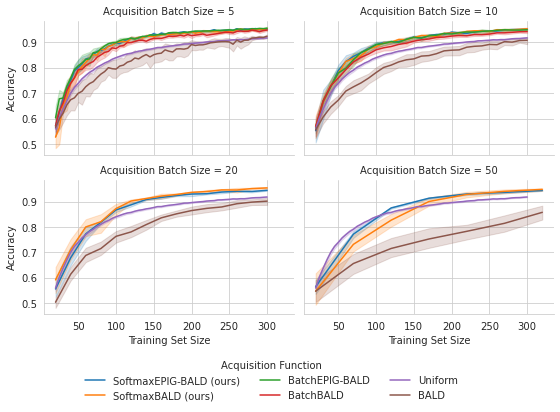

In [ ]:
# Power(Evaluation)BALD vs Batch(Evaluation)BALD

grd = sns.relplot(
    x="training_set_size",
    y="accuracy",
    col="acquisition_size",
    col_wrap=2,
    hue="power_bald_nice_acquisition_function_map",
    data=df[
        df["acquisition_function"].isin(
            [
                "random",
                "bald",
                "batchbald",
                "batchbaldical",
                "temperedbald",
                "temperedbaldical",
            ]
        )
        & ((df["temperature"] == 0) | (df["temperature"] == 8.0))
    ],
    kind="line",
    height=2.5,
    aspect=1.6,
    hue_order=list(
        map(
            to_power_bald_nice_acquisition_function,
            [
                "temperedbaldical",
                "temperedbald",
                "batchbaldical",
                "batchbald",
                "random",
                "bald",
            ],
        )
    ),
)

grd.set_xlabels("Training Set Size")
grd.set_ylabels("Accuracy")
#grd._legend.set_title()
grd.set_titles("Acquisition Batch Size = {col_name}")
grd.tight_layout()
handles, labels = grd.axes[0].get_legend_handles_labels()
grd._legend.remove()
grd.fig.legend(handles, labels, ncol=3, loc='lower left', title="Acquisition Function",
                bbox_to_anchor=(0.1, -0.15), frameon=False)
#grd._legend.set_bbox_to_anchor((0.5, .0))

In [ ]:
plt_save(grd, "plots/icml_power_vs_batch.pdf")

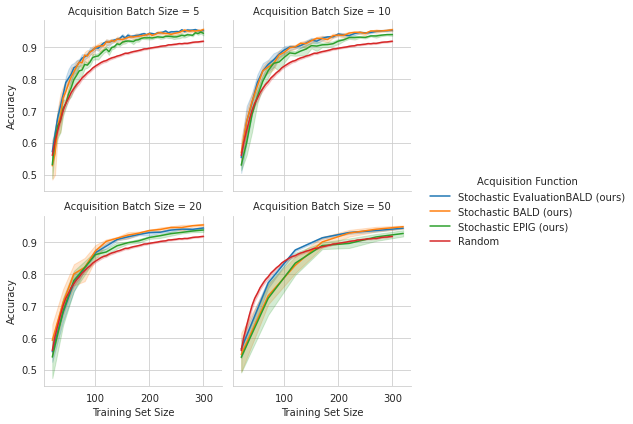

In [ ]:
# PowerEvaluationBALD vs PowerBALD vs PowerEIG

grd = sns.relplot(
    x="training_set_size",
    y="accuracy",
    col="acquisition_size",
    col_wrap=2,
    hue="nice_acquisition_function",
    data=df[
        df["acquisition_function"].isin(
            [
                "random",
                "temperedical",
                "temperedbald",
                "temperedbaldical",
            ]
        )
        & ((df["temperature"] == 0) | (df["temperature"] == 8.0))
    ],
    kind="line",
    height=3,
    hue_order=list(
        map(
            to_nice_acquisition_function,
            [
                "temperedbaldical",                
                "temperedbald",
                "temperedical",
                "random",
            ],
        )
    ),
)

grd.set_xlabels("Training Set Size")
grd.set_ylabels("Accuracy")
grd._legend.set_title("Acquisition Function")
grd.set_titles("Acquisition Batch Size = {col_name}")
grd.tight_layout()

In [ ]:
plt_save(grd, "plots/power_eval_vs_bald_vs_eig.pdf")

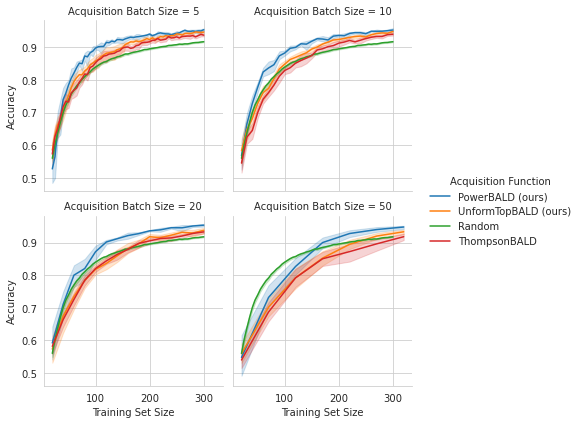

In [ ]:
# PowerEIG vs RandomBALD vs ThompsonBALD

# PowerEvaluationBALD vs PowerBALD vs PowerEIG

grd = sns.relplot(
    x="training_set_size",
    y="accuracy",
    col="acquisition_size",
    col_wrap=2,
    hue="nice_acquisition_function",
    data=df[
        df["acquisition_function"].isin(
            [
                "random",
                "randombald",
                "thompsonbald",
                "temperedbald",
            ]
        )
        & ((df["temperature"] == 0) | (df["temperature"] == 8.0))
    ],
    kind="line",
    height=3,
    hue_order=list(
        map(
            to_nice_acquisition_function,
            [
                "temperedbald",
                "randombald",
                "random",
                "thompsonbald",
            ],
        )
    ),
)

grd.set_xlabels("Training Set Size")
grd.set_ylabels("Accuracy")
grd._legend.set_title("Acquisition Function")
grd.set_titles("Acquisition Batch Size = {col_name}")
grd.tight_layout()

In [ ]:
plt_save(grd, "plots/stochasticity_comparison.pdf")

In [ ]:
df2 = df[df.accuracy >= 0.90].groupby(["seed", "acquisition_size", "acquisition_function", "temperature"]).first()

In [ ]:
df3 = df2.groupby(["acquisition_size", "acquisition_function", "temperature"]).training_set_size.quantile([0.25, 0.5, 0.75])

In [ ]:
df4 = df3.unstack().reset_index()
df5= df4[df4["temperature"].isin([0., 8.])]
del df5["temperature"]
df5 = df5[df5["acquisition_function"].isin(["bald", "baldical", "batchbald","batchbaldical", "temperedbald", "temperedbaldical"])]

In [ ]:
df5["intervals"] = df5.apply(lambda row: f"{row[0.25]}/{row[0.5]}/{row[0.75]}", axis=1)
df5.pivot("acquisition_function", columns="acquisition_size", values="intervals")


acquisition_size,5,10,20,50
acquisition_function,,,,
bald,172.5/200.0/212.5,217.5/230.0/270.0,260.0/270.0/inf,inf/inf/inf
baldical,170.0/210.0/220.0,220.0/220.0/240.0,280.0/280.0/inf,inf/inf/inf
batchbald,108.75/115.0/117.5,130.0/140.0/160.0,NaN,NaN
batchbaldical,90.0/110.0/110.0,110.0/120.0/120.0,NaN,NaN
temperedbald,102.5/105.0/108.75,110.0/110.0/130.0,120.0/120.0/140.0,170.0/170.0/220.0
temperedbaldical,100.0/110.0/110.0,110.0/110.0/110.0,140.0/140.0/140.0,170.0/170.0/170.0


In [ ]:
df2 = df[df.accuracy >= 0.95].groupby(["seed", "acquisition_size", "acquisition_function", "temperature"]).first()

In [ ]:
df3 = df2.groupby(["acquisition_size", "acquisition_function", "temperature"]).training_set_size.quantile([0.25, 0.5, 0.75])

In [ ]:
df4 = df3.unstack().reset_index()
df5= df4[df4["temperature"].isin([0., 8.])]
del df5["temperature"]
df5 = df5[df5["acquisition_function"].isin(["bald", "baldical", "batchbald","batchbaldical", "temperedbald", "temperedbaldical"])]

In [ ]:
df5["intervals"] = df5.apply(lambda row: f"{row[0.25]}/{row[0.5]}/{row[0.75]}", axis=1)
df5.pivot("acquisition_function", columns="acquisition_size", values="intervals")


acquisition_size,5,10,20,50
acquisition_function,,,,
bald,nan/inf/nan,nan/nan/nan,nan/nan/nan,inf/inf/inf
baldical,inf/inf/inf,inf/inf/inf,inf/inf/inf,inf/inf/inf
batchbald,260.0/282.5/inf,300.0/inf/inf,NaN,NaN
batchbaldical,205.0/215.0/240.0,260.0/270.0/270.0,NaN,NaN
temperedbald,248.75/262.5/273.75,240.0/260.0/260.0,260.0/280.0/300.0,320.0/320.0/inf
temperedbaldical,225.0/230.0/230.0,270.0/280.0/290.0,inf/inf/inf,inf/inf/inf
